#### reference taken from:
##### https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
##### https://www.kaggle.com/ahmethamzaemra/mlpclassifier-example
##### https://medium.com/@mikesmales/sound-classification-using-deep-learning-8bc2aa1990b7
##### https://towardsdatascience.com/speech-emotion-recognition-with-convolution-neural-network-1e6bb7130ce3

In [3]:
import soundfile
import matplotlib.pyplot as graph
import librosa
import os, glob, pickle
import numpy as numpy
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [4]:
def audioFeatureExtract(audio_file_name, set_chroma, set_mfcc, set_mel):
    with soundfile.SoundFile(audio_file_name) as audio_file:
        audio_sample_rate=audio_file.samplerate
        input = audio_file.read(dtype="float32")
        if set_chroma:
            short_time_fourier_transform=numpy.abs(librosa.stft(input))
            extracted_feature=numpy.array([])
        if set_mfcc:
            mfccs_output=numpy.mean(librosa.feature.mfcc(y=input, sr=audio_sample_rate, n_mfcc=40).T, axis=0)
            extracted_feature=numpy.hstack((extracted_feature, mfccs_output))
        if set_chroma:
            chroma_output=numpy.mean(librosa.feature.chroma_stft(S=short_time_fourier_transform, sr=audio_sample_rate).T,axis=0)
            extracted_feature=numpy.hstack((extracted_feature, chroma_output))
        if set_mel:
            mel_output=numpy.mean(librosa.feature.melspectrogram(input, sr=audio_sample_rate).T,axis=0)
            extracted_feature=numpy.hstack((extracted_feature, mel_output))
    return extracted_feature

In [5]:
# feeling that we want to predict
mood_state=['calm mood', 'happy mood', 'fearful mood', 'disgust mood']

# feeling defined in RAVDESS dataset
human_emotions={
  '01':'neutral mood',
  '02':'calm mood',
  '03':'happy mood',
  '04':'sad mood',
  '05':'angry mood',
  '06':'fearful mood',
  '07':'disgust mood',
  '08':'surprised mood'
}



In [6]:
def inputSoundFile(split_test_data):
    feature_info,feeling_info=[],[]
    for input in glob.glob("D:\\studies\\Term3\\Capstone Project\\Project\\data\\Actor_*\\*.wav"):
        sound_file=os.path.basename(input)
        feeling=human_emotions[sound_file.split("-")[2]]
        if feeling not in mood_state:
            continue
        converted_feature=audioFeatureExtract(input, set_mfcc=True, set_chroma=True, set_mel=True)
        feature_info.append(converted_feature)
        feeling_info.append(feeling)
    return train_test_split(numpy.array(feature_info), feeling_info, test_size=split_test_data, random_state=9)



In [7]:
train_feature,test_feature,train_emotion,test_emotion=inputSoundFile(split_test_data=0.25)

In [8]:
print((train_feature.shape[0], test_feature.shape[0]))

(576, 192)


In [9]:
print(f'Features extracted: {train_feature.shape[1]}')

Features extracted: 180


In [10]:
'''# Use GridSearchCV to find the best parameter combination for MLP classfier
# reference for GridSearchCV- https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa
# comment this block if GridSearchCV is not used.

combination_parameter = {'hidden_layer_sizes': [(400,400,400),(300,300,300), (150,150,150), (400,), (300,), (200,), (100,)],
                   'activation': ['identity', 'logistic', 'tanh', 'relu'],'solver': ['lbfgs', 'sgd', 'adam'],
                   'alpha': [0.0001, 0.05, 0.01], 'max_iter': [800,600,400,200], 'learning_rate': ['constant','adaptive','invscaling'],}

model = GridSearchCV(MLPClassifier(), combination_parameter, n_jobs=-1, cv=3)
model.fit(train_feature,train_emotion)

# To display best parameter combination 
print('Best parameters found:\n', model.best_params_)

# All results
mean_data = model.cv_results_['mean_test_score']
stds_data = model.cv_results_['std_test_score']
for mean_value, std_value, params_value in zip(means, stds, model.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean_value, std_value * 2, params_value))

defined_emotion, predicted_emotion = test_emotion , model.predict(test_feature)

print('Results on the test set:')
print(classification_report(defined_emotion, predicted_emotion))'''

'# Use GridSearchCV to find the best parameter combination for MLP classfier\n# reference for GridSearchCV- https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa\n\ncombination_parameter = {\'hidden_layer_sizes\': [(400,400,400),(300,300,300), (150,150,150), (400,), (300,), (200,), (100,)],\n                   \'activation\': [\'identity\', \'logistic\', \'tanh\', \'relu\'],\'solver\': [\'lbfgs\', \'sgd\', \'adam\'],\n                   \'alpha\': [0.0001, 0.05, 0.01], \'max_iter\': [800,600,400,200], \'learning_rate\': [\'constant\',\'adaptive\',\'invscaling\'],}\n\nmodel = GridSearchCV(MLPClassifier(), combination_parameter, n_jobs=-1, cv=3)\nmodel.fit(train_feature,train_emotion)\n\n# To display best parameter combination \nprint(\'Best parameters found:\n\', model.best_params_)\n\n# All results\nmean_data = model.cv_results_[\'mean_test_score\']\nstds_data = model.cv_results_[\'std_test_score\']\nfor m

In [11]:
# After finding the best parametercombination using GridSearchCV, comment the GridSearchCV section and use those parameter here to train the model.
# This option enables you to plot the loss curve in graph!!!
# comment this block if GridSearchCV is used

trained_model=MLPClassifier(hidden_layer_sizes=(400), activation = 'tanh', solver = 'adam', alpha = 0.05,  max_iter=800,
                            learning_rate='adaptive')

model= trained_model.fit(train_feature,train_emotion)



In [13]:
#predicting the test data set
predicted_emotion=model.predict(test_feature)


In [15]:
print("Train set accurary: %f" % model.score(train_feature, train_emotion))
print("Test set accurary: %f" % model.score(test_feature, test_emotion))


def calculate_accuracy(confusion_matrix):
   X = confusion_matrix.trace()
   Y = confusion_matrix.sum()
   return X / Y


cm = (100*(confusion_matrix(predicted_emotion, test_emotion)))
accuracy_value=((calculate_accuracy(cm))*100)
print("Accuracy of MLPClassifier :{:.2f}% ".format(accuracy_value))

Train set accurary: 1.000000
Test set accurary: 0.833333
Accuracy of MLPClassifier :83.33% 


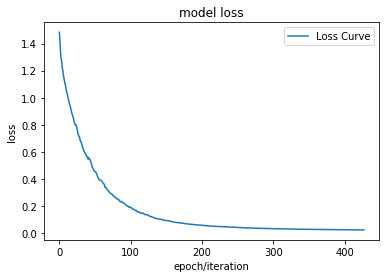

In [18]:
#plotting loss curve
graph.plot(model.loss_curve_)
graph.title('model loss')
graph.ylabel('loss')
graph.xlabel('epoch/iteration')
graph.legend(['Loss Curve'], loc='upper right')
graph.show()

In [19]:
#to display in table for predicted vs expected emotions of test data set

table = PrettyTable()

table.field_names = ["Predicted Emotion", "Expected Emotion"]

for pred_emotion, expected_emotion in zip(predicted_emotion, test_emotion):
    table.add_row([pred_emotion,expected_emotion])

print(table)


+-------------------+------------------+
| Predicted Emotion | Expected Emotion |
+-------------------+------------------+
|     happy mood    |    happy mood    |
|    fearful mood   |    calm mood     |
|     happy mood    |    happy mood    |
|     happy mood    |    happy mood    |
|    disgust mood   |   disgust mood   |
|     calm mood     |    calm mood     |
|    disgust mood   |    happy mood    |
|     happy mood    |    happy mood    |
|    disgust mood   |   disgust mood   |
|     happy mood    |    happy mood    |
|     happy mood    |    happy mood    |
|    disgust mood   |   disgust mood   |
|    fearful mood   |    happy mood    |
|     happy mood    |    happy mood    |
|    disgust mood   |   disgust mood   |
|     happy mood    |   fearful mood   |
|     calm mood     |    calm mood     |
|    disgust mood   |    happy mood    |
|    disgust mood   |   disgust mood   |
|    disgust mood   |   disgust mood   |
|     calm mood     |    calm mood     |
|    disgust moo

# Live Voice Prediction 

#### Record voice using python

In [ ]:
import pyaudio
import wave

In [ ]:
LiveAudioName = "liveVoice.wav"
# mono -1, stereo -2
audio_channels = 1
chunk_size = 1024
Format_bits_per_sample = pyaudio.paInt16
audio_duration_seconds = 4
sample_rate = 16000

py_audio = pyaudio.PyAudio()

input_stream = py_audio.open(format=Format_bits_per_sample, channels=audio_channels, 
                             rate=sample_rate, input=True, output=True, frames_per_buffer=chunk_size)

size = []
print("Recording Started...")
for input_data in range(int(sample_rate / chunk_size * audio_duration_seconds)):
    audio_data = input_stream.read(chunk_size)
    size.append(audio_data)
print("Recording Completed...")
input_stream.stop_stream()
input_stream.close()
py_audio.terminate()

Wave = wave.open(LiveAudioName, "wb")
Wave.setnchannels(audio_channels)
Wave.setsampwidth(py_audio.get_sample_size(Format_bits_per_sample))
Wave.setframerate(sample_rate)
Wave.writeframes(b"".join(size))
Wave.close()

In [ ]:
def live_load_data():
    x=[]
    file_name=os.path.basename("D:\\studies\\Term3\\Capstone Project\\liveVoice.wav")
    feature=audioFeatureExtract(file_name, set_mfcc=True, set_chroma=True, set_mel=True)
    x.append(feature)
    print("feature extracted successfully")
    return x

In [ ]:
live_pred_feature = live_load_data()

In [ ]:
live_predicted_emotion=model.predict(live_pred_feature)

In [ ]:
print("The emotion for live recording is",live_predicted_emotion[0])